

---


**Task-3 Car Price Prediction with Machine Learning**

---



The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/car data.csv")

In [5]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


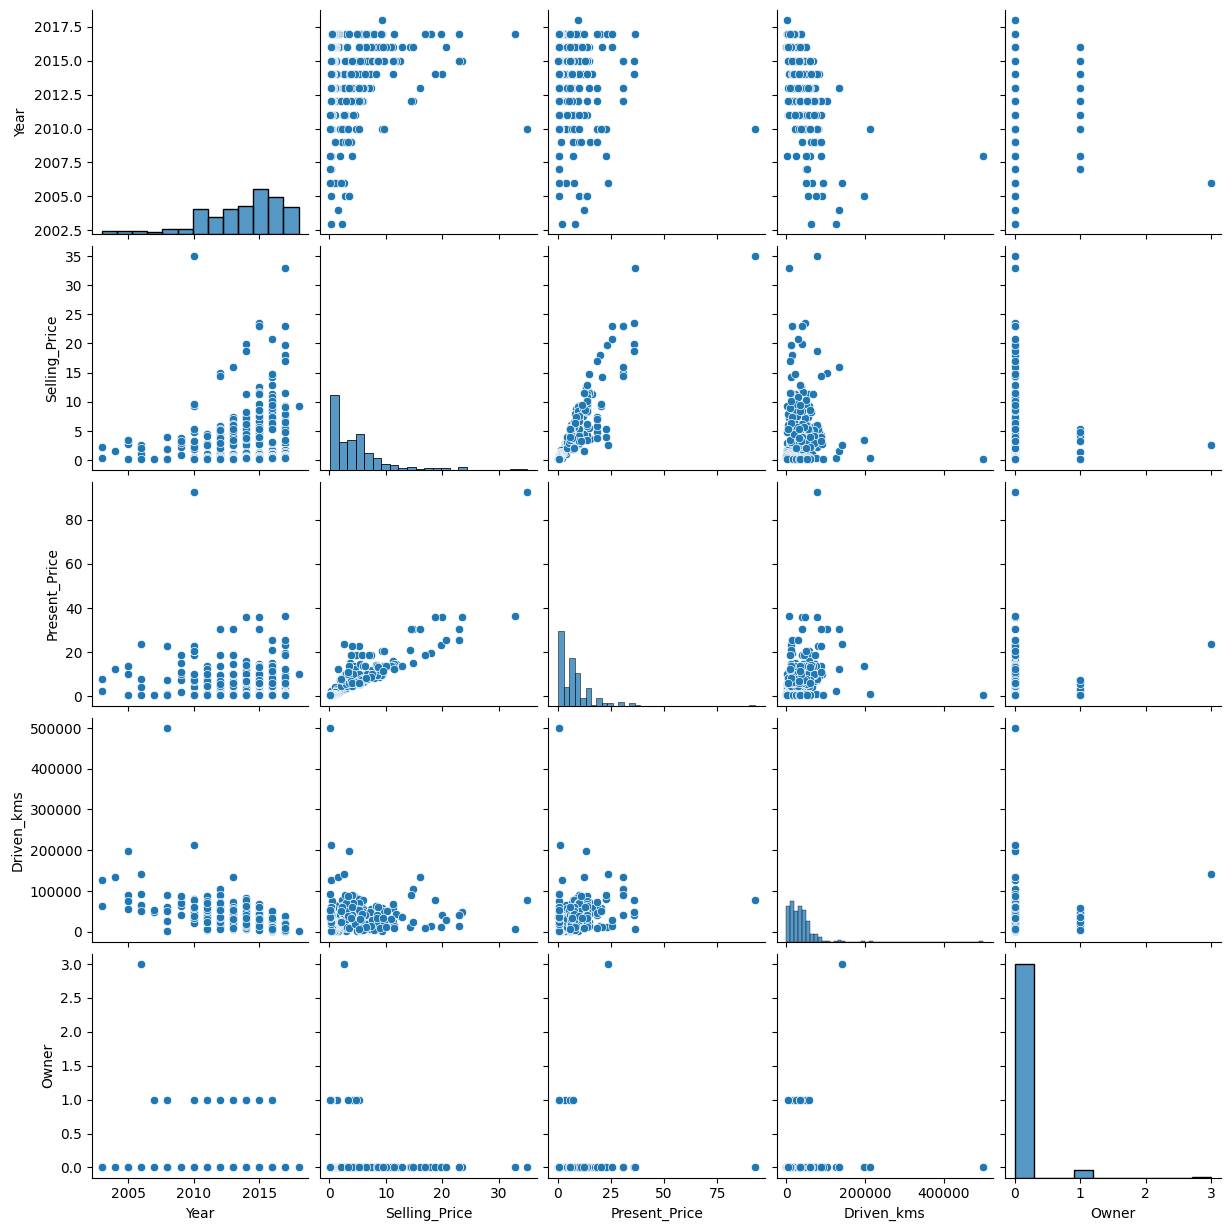

In [6]:
if 'Car_Name' in df.columns:
    df.drop(['Car_Name'], axis=1, inplace=True)
sns.pairplot(df)
plt.show()

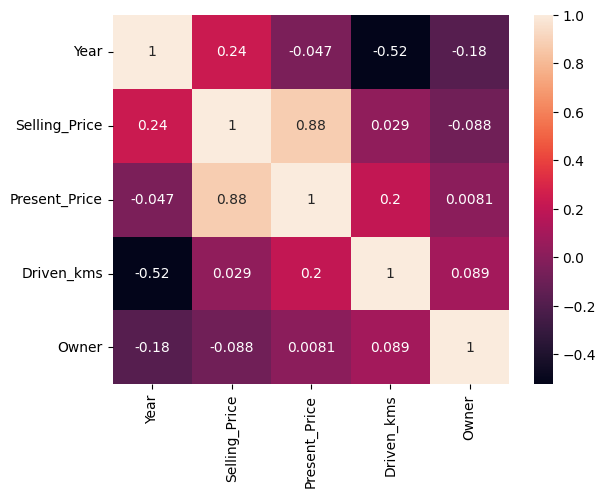

In [7]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

In [8]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.2163740193336217
MSE: 3.4813498305146187
R2 Score: 0.8488707839191938


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("R2 Score:", r2_score(y_test, rf_pred))


R2 Score: 0.9599627727989635


In [12]:
import pickle

pickle.dump(model, open('car_price_model.pkl', 'wb'))
model.predict([[2018, 50000, 1, 0, 1, 0, 1,5]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21450.64989206])